# Data Analysis - Dimensionality Reduction - Computer Exercise
Submitted By:
305056293 Yamin Ben Shimon
307573378 Alex Finkelshtein


### 1.1 Swiss Role Dataset

extra_feat_1.shape:(3000L,)
data_SR.shape:(3000L, 3L)
data_SR_ext.shape:(3000L, 5L)


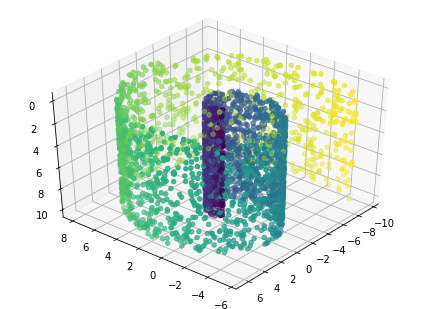

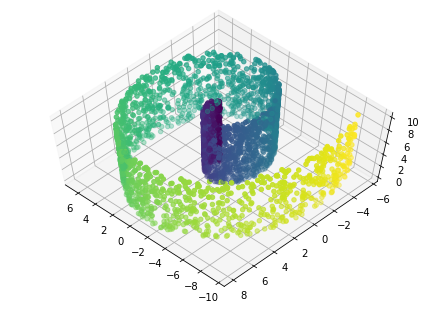

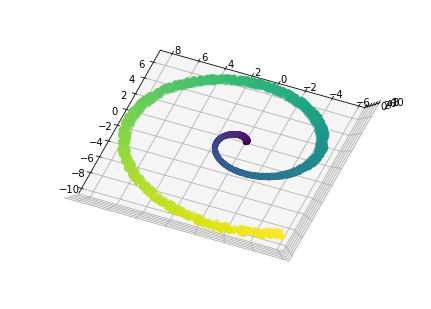

2


In [47]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import plotly.plotly as py
%matplotlib inline

#generate random vectors
u = np.random.uniform(0,10,3000)
v = np.random.uniform(0,10,3000)

#3D embedding
x = u*np.cos(u)
y = u*np.sin(u)
z = v
data_SR = np.array((x, y, z), dtype=float).transpose() #added python3
extra_feat_1 = np.arctan(y/x) #added python3
extra_feat_2 = np.sqrt(y**2+x**2) #added python3
print("extra_feat_1.shape:"+str(extra_feat_1.shape))
data_SR_ext = np.array((x, y, z, extra_feat_1, extra_feat_2), dtype=float).transpose() #added python3
# data_SR_ext = np.array([x, y, z, extra_feat_1, extra_feat_2])
print("data_SR.shape:"+str(data_SR.shape))
print("data_SR_ext.shape:"+str(data_SR_ext.shape))
#color vector
color = u/max(u)

#ploting 3D
fig3 = plt.figure()
plt.clf()
ax3 = Axes3D(fig3, rect=[0, 0, .95, 1], elev=320, azim=320)
plt.cla()
ax3.scatter(x, y, z, c=color)
plt.show()

fig1 = plt.figure()
plt.clf()
ax1 = Axes3D(fig1, rect=[0, 0, .95, 1], elev=65, azim=134)
plt.cla()
ax1.scatter(x, y, z, c=color)
plt.show()

fig2 = plt.figure()
plt.clf()
ax2 = Axes3D(fig2, rect=[0, 0, .95, 1], elev=90, azim=200)
plt.cla()
ax2.scatter(x, y, z, c=color)
plt.show()


# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# u = np.random.rand(3000, 1) * 10
# v = np.random.rand(3000, 1) * 10
# x = u*np.cos(u)
# y = u*np.sin(u)
# z = v
# data_SR = np.squeeze(np.array((x, y, z), dtype=float).transpose() )
# print(data_SR.shape)
# color  = np.squeeze(u / (u.max()))

# fig = plt.figure(figsize = (50,20))
# for i in xrange(0,3):   
#     ax = fig.add_subplot((131+i), projection='3d')
#     ax.scatter(x, y, zs = z, c = color)
#     ax.view_init(elev = i*40, azim = i*40)

# plt.show()

1.1.3 

since the data is constructed from 2 vectors of dimension nX1, its intrinsic dimention is 2. Since the transformation keeps v, but transforms u to polar cordinates, we get that after transformation, data's dimention is 3.

### 1.2 Face Dataset

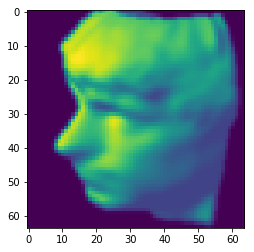

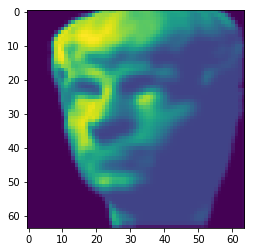

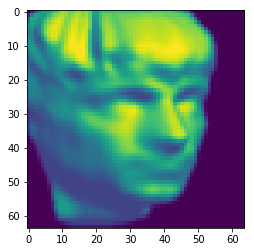

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

%matplotlib inline

data = sio.loadmat('./face_data.mat')
images = data['images']
data_Face = images.transpose()
imm1 = np.rot90(np.reshape(images.T[5],(64,64))*255,k=3)
plt.imshow(imm1, interpolation='nearest')
plt.show()

imm2 = np.rot90(np.reshape(images.T[1],(64,64))*255,k=3)
plt.imshow(imm2, interpolation='nearest')
plt.show()

imm3 = np.rot90(np.reshape(images.T[2],(64,64))*255,k=3)
plt.imshow(imm3, interpolation='nearest')
plt.show()
images_faces = data_Face

1.2.3 
Since every image represents a data point, the dimension of each image in the dataset the number of pixels per image: 64 X 64 = 4096.
Presentinthe images are 2D projections of the base, and not 3D faces. Hence, in accordance with the MLE Intrinsic Dimension derived from the article of Levina et al, the effective intrinsic dimension is around 4.

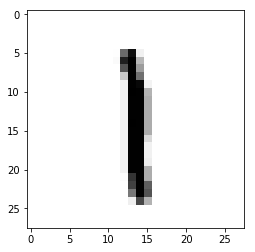

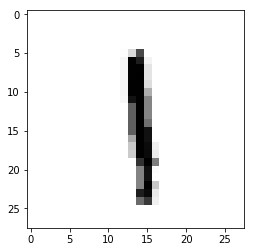

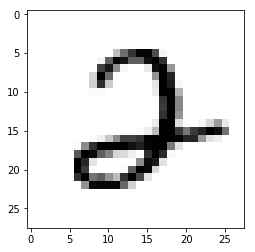

(784L, 2000L)


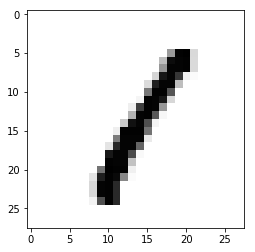

In [137]:
import pickle, gzip
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

f = gzip.open('./mnist.pkl.gz','rb')
train_set, valid_set,test_set = pickle.load(f)
f.close()
train_set_images = train_set[0]
train_set_images = train_set_images.T
train_set_digit_number = train_set[1]
# print(np.shape(train_set_images))
mnist = train_set_images.T[train_set_digit_number <4].T
# data_Mnist = mnist.transpose()

imm1 = np.rot90(np.reshape(mnist.T[8],(28,28))*255,k=0)
plt.imshow(imm1, cmap='Greys', interpolation='nearest')
plt.show()

imm2 = np.rot90(np.reshape(mnist.T[5],(28,28))*255,k=0)
plt.imshow(imm2, cmap='Greys', interpolation='nearest')
plt.show()

imm3 = np.rot90(np.reshape(mnist.T[9],(28,28))*255,k=0)
plt.imshow(imm3, cmap='Greys', interpolation='nearest')
plt.show()
# random.shuffle(mnist)
data_Mnist = mnist[:,:2000]
print(data_Mnist.shape)
mnist_images = data_Mnist.T
imm4 = np.reshape(mnist_images[1,:], (28, 28))
plt.imshow(imm4, cmap='Greys', interpolation='nearest')
plt.show()


1.3.3 
Similarly to the faces database, we define the dimension of every image as the number of pixels 28 X 28 = 784. 
The intrinsic dimension should be the amount of digits used: 4. 
However, since human writing varies between images, the true intrinsic dimension should be higher. 
From the ISOMAP/LLE tutorial we can derive that the dimension is around 10.

Q2

In [149]:
#imports & functions
import PIL
from matplotlib import offsetbox
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm
from scipy.spatial import distance_matrix
import numpy as np

#functions 

def nn2_dists(orig_data, RD_data):    
    nbrs2 = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(RD_data)
    distances_RD_nn2, indices_RD_nn2 = nbrs2.kneighbors(RD_data)
    first_neigh = indices_RD_nn2[0,0]
    second_neigh = indices_RD_nn2[0,1]
    print("first neighbour is: " + str(first_neigh))
    print("second neighbour is: " + str(second_neigh))
    dist_RD = distances_RD_nn2[0,1]
    dist_orig = norm(orig_data[first_neigh,:]-orig_data[second_neigh,:])

    print("the distance in the original space is:"+str(dist_orig)+"the distance in the Reduced space is:"+str(dist_RD))
    

    
def nn40_dists(orig_data, RD_data):    
    nbrs40 = NearestNeighbors(n_neighbors=40, algorithm='ball_tree').fit(RD_data)
    distances_RD_nn40, indices_RD_nn40 = nbrs40.kneighbors(RD_data)
    indices_RD_nn40.shape
    distances_RD_nn40.shape
    non_neighbour1 = indices_RD_nn40[0,0]
    non_neighbour2 = []
    for i in range(RD_data.shape[0]):
      if not i in indices_RD_nn40[non_neighbour1,:]:
        non_neighbour2 = i 
        print (str(non_neighbour2) + " is not a neighbour of " + str(non_neighbour1))
        break
    print("chosen neighbours are: "+str(non_neighbour1)+" and "+str(non_neighbour2))
    dist_orig = norm(orig_data[non_neighbour1,:]-orig_data[non_neighbour2,:])
    dist_RD = norm(RD_data[non_neighbour1,:]-RD_data[non_neighbour2,:])
    print("for non 40 NN points")
    print("the distance in the original space is:"+str(dist_orig)+"the distance in the Reduced space is:"+str(dist_RD))
    
    
def C_MDS (orig_data, RD_data):
    n_neighbors = 12
    nbrs12_orig = NearestNeighbors(n_neighbors=12, algorithm='ball_tree').fit(orig_data)
    distances_orig_nn12, indices_orig_nn12 = nbrs12_orig.kneighbors(orig_data)
    nbrs12 = NearestNeighbors(n_neighbors=12, algorithm='ball_tree').fit(RD_data)
    distances_RD_nn12, indices_RD_nn12 = nbrs12.kneighbors(RD_data)
    C_RD = 0
    total_MDS = 0
    for i in range(RD_data.shape[0]):
        common_list = list(set(indices_orig_nn12[i,:]).intersection(indices_RD_nn12[i,:]))
        common_size = len(common_list)
        MDS = 0
        for j in range(common_size):
            RD_dist = norm(RD_data[common_list[j],:]-RD_data[i,:])
            orig_dist = norm(orig_data[common_list[j],:]-orig_data[i,:])
            MDS += (RD_dist - orig_dist)**2
        if (common_size==0):
            continue
        total_MDS += MDS/common_size
        C_RD += (n_neighbors-common_size)
    C_RD = C_RD/RD_data.shape[0]
    total_MDS = total_MDS/RD_data.shape[0]
    return C_RD, total_MDS

def Tk_index(Dist_mat): 
    TK_ind = np.zeros(Dist_mat.shape)
    for i in range(Dist_mat.shape[0]):
        kNN = sorted(Dist_mat[i])
        for j,l in enumerate(kNN):
            TK_ind[i][j] = list(Dist_mat[i]).index(l)
    return TK_ind 

def Tk(Dist_mat,Tk_ind,k_max):
    TK = np.zeros([Dist_mat.shape[0],k_max]) #maybe define float?
    for i in range(Dist_mat.shape[0]):
        for j in range(k_max):
            TK[i][j] = Dist_mat[i][int(Tk_ind[i][j])]
    return TK
    
def Mk_Xi (TK, k1):
    num_of_samples = TK.shape[0]
    k2 = TK.shape[1]
    MK = np.zeros(TK.shape)
    
    for i in range(num_of_samples):
        for j in range(k1,k2): # from 1 to avoide division by 0
            MK[i,j] = np.sum(np.log(TK[i,j]*1.0/(TK[i,1:j])*1.0))/(j*1.0) #1.0 to make float
    MK = np.sum(MK[:,k1:],axis = 0)/(num_of_samples*1.0)       
    return MK

def est_intrinsic_dim(data, k1, k2):
    distance_mat = distance_matrix(data, data)
    Tk_ind = Tk_index(distance_mat)
    TK = Tk(distance_mat,Tk_ind,k2)
    MK_inv = Mk_Xi(TK, k1)
    M = np.sum(1/MK_inv[:k2])/((k2-k1)*1.0+1)
    return M, MK_inv

#

def q2s1(n_components,data,data_name,extra_features):
    plot_num = 2
    if (extra_features.ndim>1):
        plot_num = 3
    print('PCA based Mathods for: ' + data_name)
    #Q2.1.1.1 #python3
    pca = PCA(n_components = n_components)
    pca.fit(data)
    PCA(copy=True, iterated_power='auto', n_components=d, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False)
    print('variance of principal componenets: '+ str(pca.explained_variance_ratio_))
    data_pca = pca.transform(data)
    fig, ax = plt.subplots(plot_num, figsize = (8,10))
    ax[0].set_title("PCA")
    ax[0].scatter(data_pca[:,0], data_pca[:,1])

    #Q2.1.1.2 #python3
    kpca = KernelPCA(n_components = d, kernel='rbf', gamma=20)
    kpca.fit(data)
    
    data_kpca = kpca.transform(data)
    ax[1].set_title("KernelPCA")
    ax[1].scatter(data_kpca[:,0], data_kpca[:,1])
    
    if (extra_features.ndim>1):
        pca = PCA(n_components = d)
        pca.fit(extra_features)
        PCA(copy=True, iterated_power='auto', n_components=d, random_state=None,
        svd_solver='auto', tol=0.0, whiten=False)
        print('variance of principal componenets with extra features: '+ str(pca.explained_variance_ratio_))
        data_SR_ext_pca = pca.transform(extra_features)
        ax[2].set_title("PCA with Extra features")
        ax[2].scatter(data_SR_ext_pca[:,0], data_SR_ext_pca[:,1])
    plt.show()
    return data_pca, data_kpca

def q2s2(n_components,n_neighbors,data,data_name):    
    print('Manifold based Mathods for: ' + data_name)
    lle = LLE(n_components = n_components, n_neighbors = n_neighbors)
    lle.fit(data)
    data_lle = lle.transform(data)
    fig, ax = plt.subplots(2, figsize = (8,10))
    ax[0].set_title("LLE")
    ax[0].scatter(data_lle[:,0], data_lle[:,1])
    #Isomap
    isomap = Isomap(n_components = n_components)
    isomap.fit(data)
    data_isomap = isomap.transform(data)
    ax[1].set_title("Isomap")
    ax[1].scatter(data_isomap[:,0], data_isomap[:,1])
    plt.show()
    return data_lle, data_isomap

def q2s1_with_im(n_components,data, data_name, images, im_param):
    plot_num = 2
    print('PCA based Mathods for: ' + data_name)
    #Q2.1.1.1 #python3
    pca = PCA(n_components = n_components)
    pca.fit(data)
    PCA(copy=True, iterated_power='auto', n_components=d, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False)
    print('variance of principal componenets: '+ str(pca.explained_variance_ratio_))
    data_pca = pca.transform(data)
    print('data_pca shape:' + str(data_pca.shape))
    print('images shape:' + str(images.shape))
    fig, ax = plt.subplots(plot_num, figsize = (8,10))
    ax[0].set_title("PCA")
    ax[0].scatter(data_pca[:,0], data_pca[:,1])
    for im_ind in range(0,images.shape[0],30):
        img = PIL.Image.fromarray(np.reshape(images[im_ind, :], (im_param, im_param)))
        im = img.resize((25,25), PIL.Image.ANTIALIAS)
        imgArr = np.array(im).T
        imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(imgArr), data_pca[im_ind])
        ax[0].add_artist(imagebox)
    
    #Q2.1.1.2 #python3
    kpca = KernelPCA(n_components = d, kernel='rbf', gamma=20)
    kpca.fit(data)
    data_kpca = kpca.transform(data)
    ax[1].set_title("KernelPCA")
    ax[1].scatter(data_kpca[:,0], data_kpca[:,1])
    for im_ind in range(0,images.shape[0],30):
        img = PIL.Image.fromarray(np.reshape(images[im_ind, :], (im_param, im_param)))
        im = img.resize((25,25), PIL.Image.ANTIALIAS)
        imgArr = np.array(im).T
        imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(imgArr), data_kpca[im_ind])
        ax[1].add_artist(imagebox)
    plt.show()
    return data_pca, data_kpca

def q2s2_with_im(n_components,n_neighbors,data, data_name, images,im_param):    
    print('Manifold based Mathods for: ' + data_name)
    lle = LLE(n_components = n_components, n_neighbors = n_neighbors)
    lle.fit(data)
    data_lle = lle.transform(data)
    fig, ax = plt.subplots(2, figsize = (8,10))
    ax[0].set_title("LLE")
    ax[0].scatter(data_lle[:,0], data_lle[:,1])
    for im_ind in range(0,images.shape[0],30):
        img = PIL.Image.fromarray(np.reshape(images[im_ind, :], (im_param, im_param)))
        im = img.resize((25,25), PIL.Image.ANTIALIAS)
        imgArr = np.array(im).T
        imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(imgArr), data_lle[im_ind])
        ax[0].add_artist(imagebox)
    #Isomap
    isomap = Isomap(n_components = n_components)
    isomap.fit(data)
    data_isomap = isomap.transform(data)
    ax[1].set_title("Isomap")
    ax[1].scatter(data_isomap[:,0], data_isomap[:,1])
    for im_ind in range(0,images.shape[0],30):
        img = PIL.Image.fromarray(np.reshape(images[im_ind, :], (im_param, im_param)))
        im = img.resize((25,25), PIL.Image.ANTIALIAS)
        imgArr = np.array(im).T
        imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(imgArr), data_isomap[im_ind])
        ax[1].add_artist(imagebox)
    plt.show()
    return data_lle, data_isomap


PCA based Mathods for: Swiss Role
variance of principal componenets: [ 0.45071807  0.34072861]
variance of principal componenets with extra features: [ 0.38514672  0.301396  ]


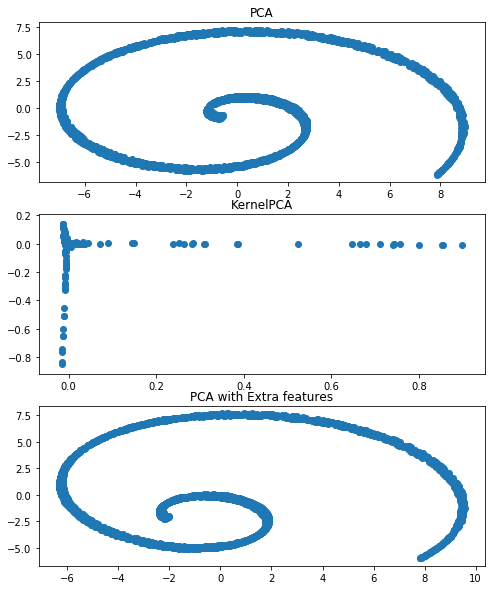

In [150]:
#Q2 #python3
#Q2.1 #python3
d = 2
#Q2.1.1 #python3
data_SR_pca, data_SR_kpca = q2s1(2,data_SR,'Swiss Role',data_SR_ext)
#extra features:
# Q2.1.1.3 #python3



Manifold based Mathods for: Swiss Role


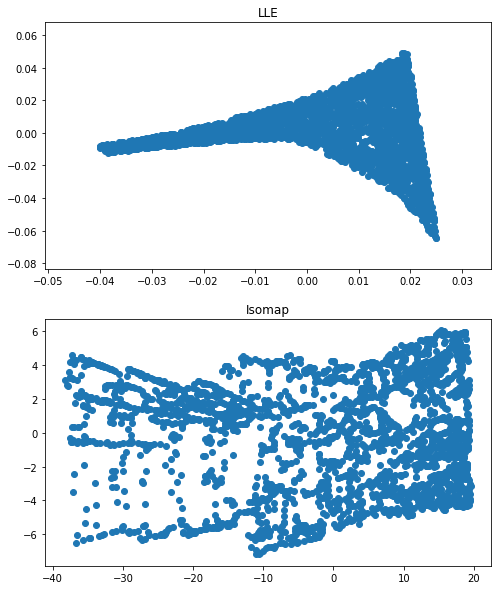

In [141]:
#Q2.1.2 #python2
data_SR_lle, data_SR_isomap = q2s2(2,10,data_SR,'Swiss Role')


In [16]:
#Q2.1.3 #python2
print('Euclidean distances in the low-dimensional representation for: Swiss Role')
print('\n2-NN distances results:')
orig_data = data_SR
#PCA
print("PCA:")
RD_data = data_SR_pca
nn2_dists(orig_data, RD_data)

#KPCA
print("KPCA:")
RD_data = data_SR_kpca
nn2_dists(orig_data, RD_data)

#LLE
print("LLE:")
RD_data = data_SR_lle
nn2_dists(orig_data, RD_data)

#Isomap
print("Isomap:")
RD_data = data_SR_isomap
nn2_dists(orig_data, RD_data)

#Q2.1.3.2 #python2
print('\n40-NN distances results:')
#PCA
print("PCA:")
RD_data = data_SR_pca
nn40_dists(orig_data, RD_data)
    
#KPCA
print("KPCA:")
RD_data = data_SR_kpca
nn40_dists(orig_data, RD_data)

#LLE
print("LLE:")
RD_data = data_SR_lle
nn40_dists(orig_data, RD_data)

#Isomap
print("Isomap:")
RD_data = data_SR_isomap
nn40_dists(orig_data, RD_data)

print('\n12-NN in Low but not in high, C and MDS results:')
#PCA
print("PCA:")
orig_data = data_SR
RD_data = data_SR_pca
C_PCA, total_MDS_PCA =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_PCA))
print("the mean value of MDS is "+ str(total_MDS_PCA))

#KPCA
print("KPCA:")
RD_data = data_SR_kpca
C_KPCA, total_MDS_KPCA =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_KPCA))
print("the mean value of MDS is "+ str(total_MDS_KPCA))

#LLE
print("LLE:")
RD_data = data_SR_lle
C_LLE, total_MDS_LLE =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_LLE))
print("the mean value of MDS is "+ str(total_MDS_LLE))

#Isomap
print("Isomap:")
RD_data = data_SR_isomap
C_Isomap, total_MDS_Isomap =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_Isomap))
print("the mean value of MDS is "+ str(total_MDS_Isomap))



Euclidean distances in the low-dimensional representation for: Swiss Role

2-NN distances results:
PCA:
first neighbour is: 0
second neighbour is: 1202
the distance in the original space is:1.5593280074the distance in the Reduced space is:0.0390099699981
KPCA:
first neighbour is: 0
second neighbour is: 1202
the distance in the original space is:1.5593280074the distance in the Reduced space is:0.0390099699981
LLE:
first neighbour is: 0
second neighbour is: 471
the distance in the original space is:0.575165718512the distance in the Reduced space is:0.000534169223294
Isomap:
first neighbour is: 0
second neighbour is: 471
the distance in the original space is:0.575165718512the distance in the Reduced space is:0.390512152804

40-NN distances results:
PCA:
1 is not a neighbour of 0
chosen neighbours are: 0 and 1
for non 40 NN points
the distance in the original space is:11.7523325915the distance in the Reduced space is:6.76545207147
KPCA:
1 is not a neighbour of 0
chosen neighbours are: 0 an

Intrinsic dimension claculation: Swiss Role
M the intrinsic dimension estimation is: 2.06205755315


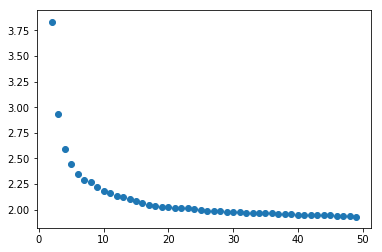

In [17]:
#Q2.1.3.4 #python2

#Verification of the intrinsic dimension
## implement Maximum Likelihood Estimation of Intrinsic Dimension
#plot sum of eigenvalues outside of reduced model (d+1...D) as a function of 
#choose d corresponding to graphs "knee"
print('Intrinsic dimension claculation: Swiss Role')
num_of_samples = 1000
data = data_SR[0:num_of_samples] #slice data
k1 = 2 
k2 = 50
M, MK = est_intrinsic_dim(data, k1, k2)
print("M the intrinsic dimension estimation is: "+ str(M))
#show behaviour of MK as function of K
plt.scatter(range(k1,(MK.shape[0])+k1),1/MK)
plt.show()

PCA based Mathods for: face Dataset
variance of principal componenets: [ 0.27073666  0.21588143]
data_pca shape:(698L, 2L)
images shape:(698L, 4096L)


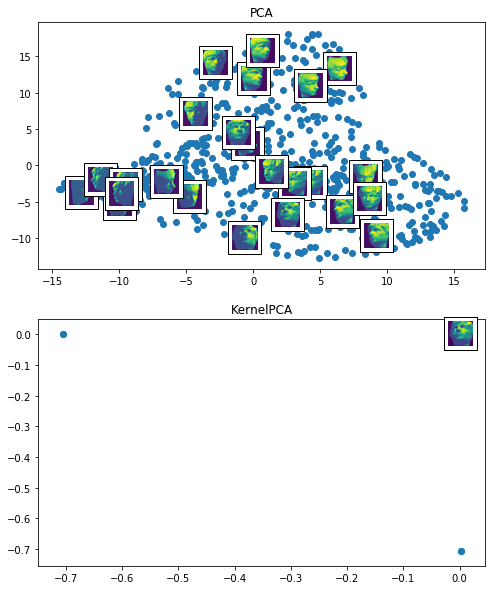

In [151]:
#Q2.1.1 #python3
d = 2
im_param = 64
data_name = 'face Dataset'
data = data_Face
data_Face_pca, data_Face_kpca = q2s1_with_im(d,data, data_name, images_faces, im_param)

Manifold based Mathods for: face Dataset


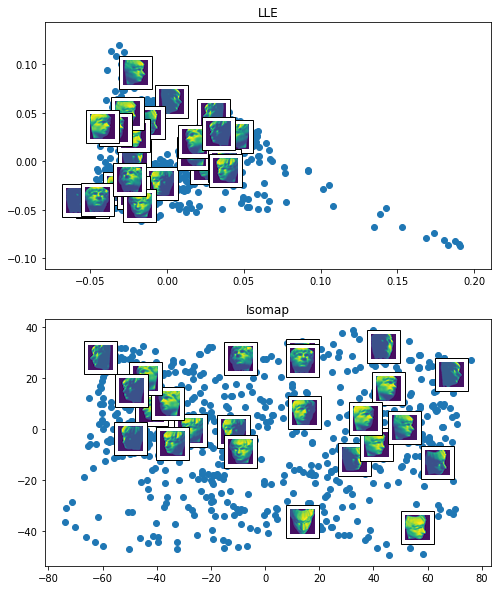

In [118]:
#Q2.1.2 #python2
data_Face_lle, data_Face_isomap = q2s2_with_im(2,10, data, data_name, images_faces, im_param)

In [20]:
#Q2.1.3 #python2
print('Euclidean distances in the low-dimensional representation for: '+ data_name)
print('\n2-NN distances results:')
orig_data = data_Face
#PCA
print("PCA:")
RD_data = data_Face_pca
nn2_dists(orig_data, RD_data)

#KPCA
print("KPCA:")
RD_data = data_Face_kpca
nn2_dists(orig_data, RD_data)

#LLE
print("LLE:")
RD_data = data_Face_lle
nn2_dists(orig_data, RD_data)

#Isomap
print("Isomap:")
RD_data = data_Face_isomap
nn2_dists(orig_data, RD_data)

#Q2.1.3.2 #python2
print('\n40-NN distances results:')
#PCA
print("PCA:")
RD_data = data_Face_pca
nn40_dists(orig_data, RD_data)
    
#KPCA
print("KPCA:")
RD_data = data_Face_kpca
nn40_dists(orig_data, RD_data)

#LLE
print("LLE:")
RD_data = data_Face_lle
nn40_dists(orig_data, RD_data)

#Isomap
print("Isomap:")
RD_data = data_Face_isomap
nn40_dists(orig_data, RD_data)

print('\n12-NN in Low but not in high, C and MDS results:')
#PCA
print("PCA:")
orig_data = data_Face
RD_data = data_Face_pca
C_PCA, total_MDS_PCA =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_PCA))
print("the mean value of MDS is "+ str(total_MDS_PCA))

#KPCA
print("KPCA:")
RD_data = data_Face_kpca
C_KPCA, total_MDS_KPCA =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_KPCA))
print("the mean value of MDS is "+ str(total_MDS_KPCA))

#LLE
print("LLE:")
RD_data = data_Face_lle
C_LLE, total_MDS_LLE =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_LLE))
print("the mean value of MDS is "+ str(total_MDS_LLE))

#Isomap
print("Isomap:")
RD_data = data_Face_isomap
C_Isomap, total_MDS_Isomap =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_Isomap))
print("the mean value of MDS is "+ str(total_MDS_Isomap))



Euclidean distances in the low-dimensional representation for: face Dataset

2-NN distances results:
PCA:
first neighbour is: 0
second neighbour is: 219
the distance in the original space is:11.7479679384the distance in the Reduced space is:0.705898811787
KPCA:
first neighbour is: 0
second neighbour is: 219
the distance in the original space is:11.7479679384the distance in the Reduced space is:0.705898811787
LLE:
first neighbour is: 0
second neighbour is: 389
the distance in the original space is:10.2711166355the distance in the Reduced space is:0.00448845486288
Isomap:
first neighbour is: 0
second neighbour is: 73
the distance in the original space is:16.0638647867the distance in the Reduced space is:2.55534641787

40-NN distances results:
PCA:
1 is not a neighbour of 0
chosen neighbours are: 0 and 1
for non 40 NN points
the distance in the original space is:18.8309495227the distance in the Reduced space is:7.72335678616
KPCA:
1 is not a neighbour of 0
chosen neighbours are: 0 and 1
f

Intrinsic dimension claculation for: face Dataset
M the intrinsic dimension estimation is: 4.57896928101


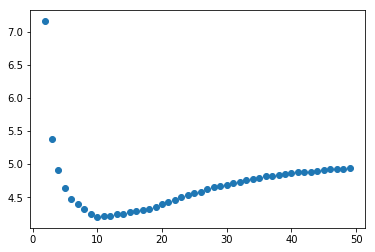

In [21]:
#Q2.1.3.4 #python2

#Verification of the intrinsic dimension
## implement Maximum Likelihood Estimation of Intrinsic Dimension
#plot sum of eigenvalues outside of reduced model (d+1...D) as a function of 
#choose d corresponding to graphs "knee"
print('Intrinsic dimension claculation for: '+data_name)
num_of_samples = 500
data = data_Face[0:num_of_samples] #slice data
k1 = 2 
k2 = 50
M, MK = est_intrinsic_dim(data, k1, k2)
print("M the intrinsic dimension estimation is: "+str(M))
#show behaviour of MK as function of K
plt.scatter(range(k1,(MK.shape[0])+k1),1/MK)
plt.show()

PCA based Mathods for: mnist Dataset
variance of principal componenets: [ 0.17703618  0.07986514]
data_pca shape:(2000L, 2L)
images shape:(2000L, 784L)


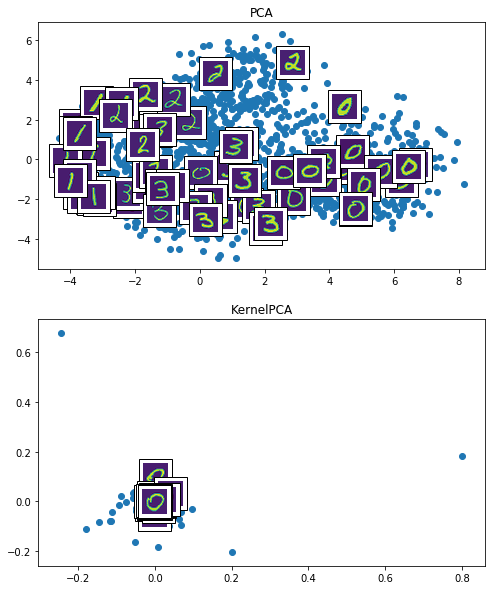

In [138]:
#Q2.1.1 #python3
d = 2
im_param = 28
mnist_images
data_name = 'mnist Dataset'
data = data_Mnist
# data_Mnist_pca, data_Mnist_kpca = q2s1(d, data, data_name, np.array(0))
data_Mnist_pca, data_Mnist_kpca = q2s1_with_im(d,data.T, data_name, mnist_images, im_param)

(784L, 2000L)
Manifold based Mathods for: mnist Dataset


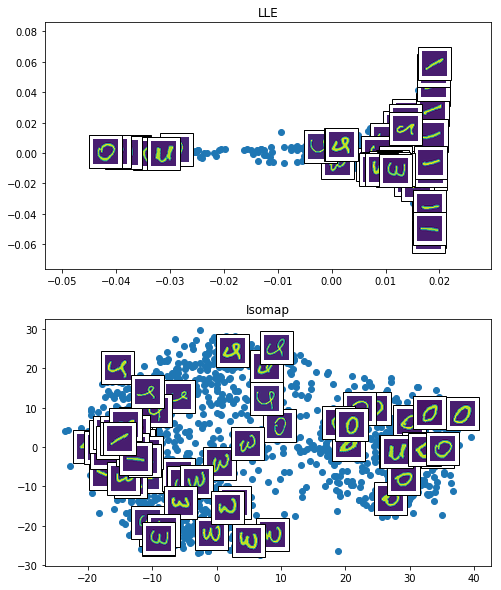

In [140]:
#Q2.1.2 #python2
print(data.shape)
# data_Mnist_lle, data_Mnist_isomap = q2s2(2,10, data, data_name)
data_Mnist_lle, data_Mnist_isomap = q2s2_with_im(2,10, data.T, data_name, mnist_images, im_param)

In [32]:
#Q2.1.3 #python2
print('Euclidean distances in the low-dimensional representation for: '+ data_name)
print('\n2-NN distances results:')
orig_data = data_Mnist
#PCA
print("PCA:")
RD_data = data_Mnist_pca
nn2_dists(orig_data, RD_data)

#KPCA
print("KPCA:")
RD_data = data_Mnist_kpca
nn2_dists(orig_data, RD_data)

#LLE
print("LLE:")
RD_data = data_Mnist_lle
nn2_dists(orig_data, RD_data)

#Isomap
print("Isomap:")
RD_data = data_Mnist_isomap
nn2_dists(orig_data, RD_data)

#Q2.1.3.2 #python2
print('\n40-NN distances results:')
#PCA
print("PCA:")
RD_data = data_Mnist_pca
nn40_dists(orig_data, RD_data)
    
#KPCA
print("KPCA:")
RD_data = data_Mnist_kpca
nn40_dists(orig_data, RD_data)

#LLE
print("LLE:")
RD_data = data_Mnist_lle
nn40_dists(orig_data, RD_data)

#Isomap
print("Isomap:")
RD_data = data_Mnist_isomap
nn40_dists(orig_data, RD_data)

print('\n12-NN in Low but not in high, C and MDS results:')
#PCA
print("PCA:")
orig_data = data_Mnist
RD_data = data_Mnist_pca
C_PCA, total_MDS_PCA =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_PCA))
print("the mean value of MDS is "+ str(total_MDS_PCA))

#KPCA
print("KPCA:")
RD_data = data_Mnist_kpca
C_KPCA, total_MDS_KPCA =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_KPCA))
print("the mean value of MDS is "+ str(total_MDS_KPCA))

#LLE
print("LLE:")
RD_data = data_Mnist_lle
C_LLE, total_MDS_LLE =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_LLE))
print("the mean value of MDS is "+ str(total_MDS_LLE))

#Isomap
print("Isomap:")
RD_data = data_Mnist_isomap
C_Isomap, total_MDS_Isomap =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_Isomap))
print("the mean value of MDS is "+ str(total_MDS_Isomap))



Euclidean distances in the low-dimensional representation for: mnist Dataset

2-NN distances results:
PCA:
first neighbour is: 384
second neighbour is: 101
the distance in the original space is:0.0the distance in the Reduced space is:0.0
KPCA:
first neighbour is: 384
second neighbour is: 101
the distance in the original space is:0.0the distance in the Reduced space is:0.0
LLE:
first neighbour is: 27
second neighbour is: 14
the distance in the original space is:0.0the distance in the Reduced space is:0.0
Isomap:
first neighbour is: 115
second neighbour is: 480
the distance in the original space is:0.0the distance in the Reduced space is:0.0

40-NN distances results:
PCA:
0 is not a neighbour of 44
chosen neighbours are: 44 and 0
for non 40 NN points
the distance in the original space is:0.0the distance in the Reduced space is:0.0
KPCA:
0 is not a neighbour of 44
chosen neighbours are: 44 and 0
for non 40 NN points
the distance in the original space is:0.0the distance in the Reduced spac

Intrinsic dimension claculation for: mnist Dataset
M the intrinsic dimension estimation is: 4.57896928101


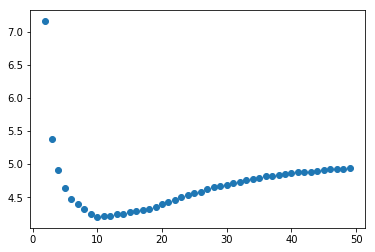

In [33]:
#Q2.1.3.4 #python2

#Verification of the intrinsic dimension
## implement Maximum Likelihood Estimation of Intrinsic Dimension
#plot sum of eigenvalues outside of reduced model (d+1...D) as a function of 
#choose d corresponding to graphs "knee"
print('Intrinsic dimension claculation for: '+data_name)
num_of_samples = 500
data = data_Face[0:num_of_samples] #slice data
k1 = 2 
k2 = 50
M, MK = est_intrinsic_dim(data, k1, k2)
print("M the intrinsic dimension estimation is: "+str(M))
#show behaviour of MK as function of K
plt.scatter(range(k1,(MK.shape[0])+k1),1/MK)
plt.show()

Q2.4 - Questions
2.4.1
by adding features which have more variance for example by using the knwoledge about the real parametrization, we belived we can imporve the performance of the PCA but effectively we got worse performance.
the KPCA had unexpected behaiour, for some sigmas we got same transformation as the regular PCA and for others wierd distributions.

2.4.2
Swiss Roll: Kernel PCA

The Kernel PCA algorithm captures the gives a high variance display in the low dimension.

Face Dataset: Isomap

The Isomap algorithm takes the best result due to accurate globaly based manifold extraction method.

MNIST Database: LLE

We can see that LLE gives a great dimension reduction in the results, This is due to the fact that the data itself is already clustered in high dimension due to the digit seperation.

2.4.3
Good Dimension Reduction algorithm should be close to 0. The nearest neighbours on the manifold are the nearest neighbours on the higher dimensional place which means that the algorithm supposingly successfuly finds the geodesic distances on the embedded manifold.

2.4.4
For the Swiss Roll we get good results, because the reduced dimension equals to the intrinsic dimension.
for the other two datasets we get less successful results due to the fact that the intrinsic dimension is higher than 2.

In [ ]:
# Question 3

In [ ]:
1.We load dataset and create patches of 6X6 at random places in image

In [152]:
from sklearn.datasets import load_sample_images, fetch_lfw_people
import numpy as np
import random


# Load data set
dataSet = fetch_lfw_people()
listpatches = np.empty([1500,36])
imset = dataSet.images[0:50,1:61,2:44] / 255.0
for k in range(0,imset.shape[0]):
    image = imset[k,:,:]
    [xd,yd] = [int(image.shape[0]/6),int(image.shape[1]/6)]
    currentPatch = np.empty([xd*yd,6,6])
    for i in range(0, xd):
        for j in range (0,yd):
            currentPatch[i*yd+j]=image[i*6:(6*i+6),j*6:(6*j+6)]  
    img = random.sample(range(0, 70), 30)
    listpatches[k*30:(30+(k*30)),:] = np.reshape(currentPatch[img,:,:],(30,-1), order='C'); 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread

C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\afinkels\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

2.we preform pca on the data set, by taking an patch of 6X6 and reducing its dimention to d. 
Using a transformation matrix we compress the patch to lower dimensions, and using the inverse transformation matrix we reconstruct the patch

3.we propose the following dimension reduction procedure:
we choose an image from dataset and extract a subset of patches from data set. 
we reduce the dimension of each patch using the pca procedure presentend in [2].
using the inverse transformation matrix on the patches, we can then restore the image, and present it.

In [158]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


meanslist = []
linx = np.linspace(3,30,28)
for d in linx:
    pca_d  = PCA(n_components=int(d)).fit(listpatches)
    Errors = np.empty([100])
    imNUM  = random.sample(range(50, dataSet.images.shape[0]), 100)
    for num in range(0,Errors.shape[0]):
        #retrieve patches
        image = dataSet.images[imNUM[num],1:61,2:44]/255    
        [xd,yd] = [int(image.shape[0]/6),int(image.shape[1]/6)]
        currentPatch = np.empty([xd*yd,6,6])
        for i in range(0, xd):
            for j in range (0,yd):
                currentPatch[i*yd+j]=image[i*6:(6*i+6),j*6:(6*j+6)]
        #reshape patches
        listpatchesReshaped = np.reshape(currentPatch,(-1,36),order='C')
        #PCA
        transformed = pca_d.transform(listpatchesReshaped)
        reconstructed = pca_d.inverse_transform(transformed)
        #error calc
        diff = reconstructed - listpatchesReshaped
        Errors[num] = np.mean(np.abs(diff**2))
        
    meanslist.append( 0.04*d/(36) + np.mean(Errors))

4.
The quality is defined as: $$ quality= 0.04*\frac{d_I}{D_I} + E_{I~P(I)} [\frac{1}{D_i} \sum_{i=1}^{D_I}{ | I_i-\hat{I_I}|}]$$

The first part represents the compression ratio.

The second part represents the reconstruction error.

we draw random samples from the data set, and calculate the average quality for every d in range 1 < d < 36

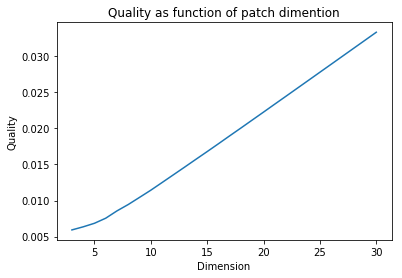

In [160]:
# Plot 
fig = plt.figure()
plt.title('Quality as function of patch dimention')
plt.plot(linx, meanslist)
plt.ylabel('Quality')
plt.xlabel('Dimension')
plt.show()  

5.To find the best d we'll use the quality we defined in the last section. as we can see, the graph shows that for d values bigger than 15, the compresion ratio is clearly dominant, while for values smaller than 10, the reconstruction error becomes dominant.
we deduce, than, we should choose an average d as the best.
using this argument, we choose the best d to be 12.

6.

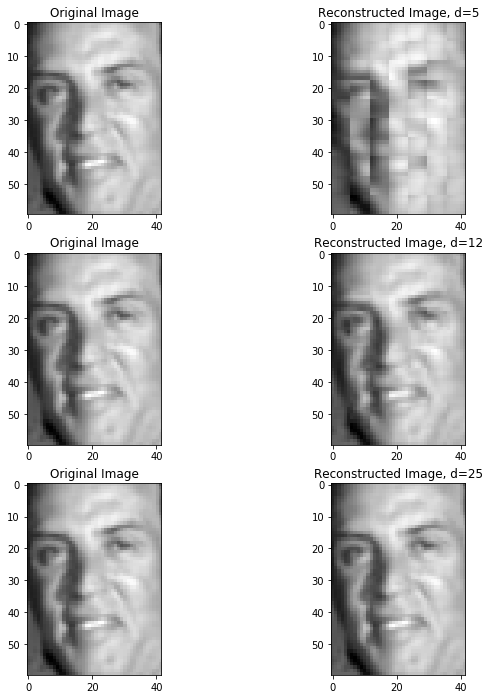

In [162]:
randomIndex = random.sample(range(50, dataSet.images.shape[0]), 1)
sImgparams = dataSet.images[randomIndex, 1:61, 2:44]
image = np.reshape(sImgparams, (sImgparams.shape[1], sImgparams.shape[2]))
figrestored = plt.figure(figsize=(10, 12))
I= 1
for d in [5,12,25]:
    figrestored.add_subplot(3,2,I)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    pca_d = PCA(n_components=int(d)).fit(listpatches)
    # compress and reconstruct image 
    [xd,yd] = [int(image.shape[0]/6),int(image.shape[1]/6)]
    currentPatch = np.empty([xd*yd,6,6])
    for i in range(0, xd):
        for j in range (0,yd):
            currentPatch[i*yd+j]=image[i*6:(6*i+6),j*6:(6*j+6)]
    #reshape patches
    listpatchesReshaped = np.reshape(currentPatch,(-1,36),order='C')
    #PCA
    transformed = pca_d.transform(listpatchesReshaped)
    reconstructed = pca_d.inverse_transform(transformed)
    # show reconstructed image
    blocks      = np.reshape(reconstructed,(-1,6,6),order='C')
    #reconstructBlock(blocks, images.shape)
    width = blocks.shape[2]
    [xd,yd] = [int(image.shape[0]/width),int(image.shape[1]/width)]
    imageRecon  = np.empty(image.shape)
    for i in range(0, xd):
        for j in range (0,yd):
            imageRecon[width*i:width*(i+1),width*j:width*(j+1)] = blocks[i*yd+j]
    figrestored.add_subplot(3,2,I+1)
    I+=2
    plt.title('Reconstructed Image, d={}'.format(d))
    plt.imshow(imageRecon, cmap='gray')
    
plt.show()